In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import datetime as dt
from pandas import DataFrame
plt.rc('font', family='Malgun Gothic')
import pickle
from tqdm.notebook import tqdm
import re
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#한글 폰트 살리기 위함 -> 타이틀에만 반영되더라 ㅠ
from matplotlib import rc
from matplotlib import font_manager as fm

In [3]:
from matplotlib import rcParams
import matplotlib as mpl

In [4]:
#nanum 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['Malgun Gothic'], 설정 폰트 사이즈: 10.0


In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
#여기가 폰트 사이즈를 정하는 곳.
font_name = fm.FontProperties(fname=path, size=16).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [8]:
fm._rebuild()

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [35]:
# 출처 : http://www.cdc.go.kr/npt/biz/npp/ist/bass/bassSexdstnAgeStatsMain.do#
nowon_a=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/Data(given)/2010_2020_노원구_A형간염.csv',encoding='euc-kr',header=None)

In [36]:
nowon_a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,계,계,-,46,7,9,9,16,59,47,31,145,26,NaN
1,계,남,-,27,5,6,6,12,39,23,11,88,12,NaN
2,계,여,-,19,2,3,3,4,20,24,20,57,14,NaN
3,0~9세,계,-,0,0,0,0,0,0,0,0,0,0,NaN
4,0~9세,남,-,0,0,0,0,0,0,0,0,0,0,NaN
5,0~9세,여,-,0,0,0,0,0,0,0,0,0,0,NaN
6,10~19세,계,-,4,0,0,0,0,1,3,0,2,2,NaN
7,10~19세,남,-,3,0,0,0,0,1,1,0,2,0,NaN
8,10~19세,여,-,1,0,0,0,0,0,2,0,0,2,NaN
9,20~29세,계,-,15,2,3,3,3,5,5,7,21,4,NaN


In [37]:
nowon_a.columns=['연령', '성별','2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020','-']
nowon_a=nowon_a[['연령', '성별' ,'2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020']]
nowon_a

,연령,성별,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,계,계,46,7,9,9,16,59,47,31,145,26
1,계,남,27,5,6,6,12,39,23,11,88,12
2,계,여,19,2,3,3,4,20,24,20,57,14
3,0~9세,계,0,0,0,0,0,0,0,0,0,0
4,0~9세,남,0,0,0,0,0,0,0,0,0,0
5,0~9세,여,0,0,0,0,0,0,0,0,0,0
6,10~19세,계,4,0,0,0,0,1,3,0,2,2
7,10~19세,남,3,0,0,0,0,1,1,0,2,0
8,10~19세,여,1,0,0,0,0,0,2,0,0,2
9,20~29세,계,15,2,3,3,3,5,5,7,21,4


In [38]:
no_u= nowon_a[nowon_a['성별']=='계']

In [39]:
no_u

,연령,성별,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,계,계,46,7,9,9,16,59,47,31,145,26
3,0~9세,계,0,0,0,0,0,0,0,0,0,0
6,10~19세,계,4,0,0,0,0,1,3,0,2,2
9,20~29세,계,15,2,3,3,3,5,5,7,21,4
12,30~39세,계,22,2,3,2,10,26,20,8,41,3
15,40~49세,계,5,3,1,4,2,22,16,13,66,11
18,50~59세,계,0,0,1,0,1,5,2,1,11,5
21,60~69세,계,0,0,0,0,0,0,0,2,2,1
24,70세 이상,계,0,0,1,0,0,0,1,0,2,0


In [40]:
idx_list = no_u['연령']

In [41]:
no_u_ = no_u.T
no_u_.columns = idx_list
uu = no_u_[2:]
uu.astype(int)
uu.columns

Index(['계 ', '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세',
       '60~69세', '70세 이상'],
      dtype='object', name='연령')

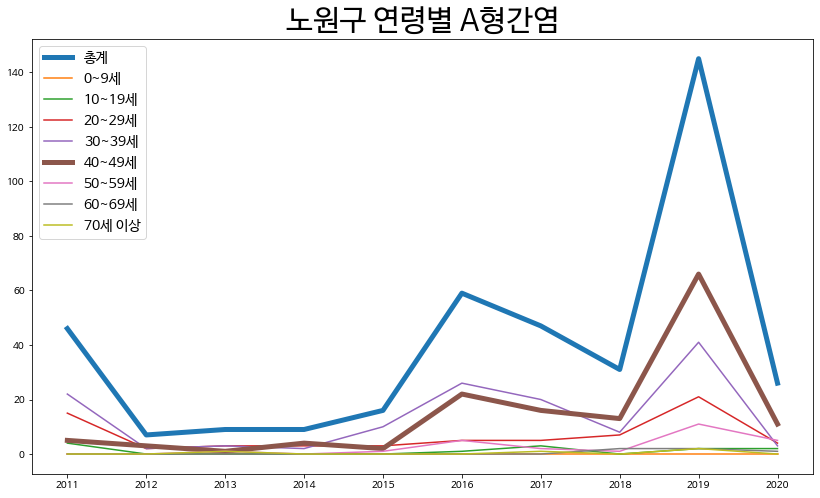

In [45]:
plt.figure(figsize=(14,8))
plt.plot(uu.index,uu['계 '],linewidth=5)
plt.plot(uu.index,uu['0~9세'])
plt.plot(uu.index,uu['10~19세'])
plt.plot(uu.index,uu['20~29세'])
plt.plot(uu.index,uu['30~39세'])
plt.plot(uu.index,uu['40~49세'],linewidth=5)
plt.plot(uu.index,uu['50~59세'])
plt.plot(uu.index,uu['60~69세'])
plt.plot(uu.index,uu['70세 이상'])
plt.rcParams["figure.figsize"] = (20,11)
plt.legend(labels=['총계','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70세 이상'],prop={'size':14})
plt.title('노원구 연령별 A형간염',fontsize=30)
plt.show()
